In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras.preprocessing.image as image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score


In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download ashishjangra27/face-mask-12k-images-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##loading train images and label from folders 
x_train=[]
y_train=[]
for i in os.listdir('/content/Face Mask Dataset/Train'):
  for img in os.listdir(f'/content/Face Mask Dataset/Train/{i}'):
    img=image.load_img(f'/content/Face Mask Dataset/Train/{i}/{img}',target_size=(96, 96))
    x_train.append(img)
    y_train.append(i)

In [ ]:
##preprocessing images  
for i in range(len(x_train)):
  x_train[i]= image.img_to_array(x_train[i])

x_train= np.array(x_train)
y_train= np.array(y_train)

In [ ]:
# incoding label from string (mask-NoMask) to (0-1)
encoder = LabelEncoder()
encoder.fit(y_train)
y_label_train = encoder.transform(y_train)

In [ ]:
## loading valdation images
x_vald=[]
y_vald=[]
for i in os.listdir('/content/Face Mask Dataset/Validation'):
  for img in os.listdir(f'/content/Face Mask Dataset/Validation/{i}'):
    img=image.load_img(f'/content/Face Mask Dataset/Validation/{i}/{img}',target_size=(96, 96))
    x_vald.append(img)
    y_vald.append(i)

In [ ]:
for i in range(len(x_vald)):
  x_vald[i]= image.img_to_array(x_vald[i])

x_vald= np.array(x_vald)
y_vald= np.array(y_vald)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_vald)
y_label_vald = encoder.transform(y_vald)


In [ ]:
encoder.inverse_transform([0])[0]

'WithMask'

#Model bulding 

### Model from scratch 

In [ ]:
# Designing our model
model = keras.Sequential([
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    #preprocessing.RandomContrast(0.5), # contrast change by up to 50%
    #preprocessing.Normalization()
    # Base
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', 
                        input_shape = x_train.shape[1:]),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    # Head
    layers.Flatten(),
    #layers.Dense(2048, activation='relu')  ,
    #layers.Dropout(0.5),
    #layers.Dense(1024,activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(1 , activation='sigmoid'),
])
# Compiling our model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

# saving the training details in history variable
hist = model.fit(
    x_train,y_label_train,
    validation_data=(x_vald,y_label_vald),
    epochs=20
)

Epoch 1/20
313/313 [==============================] - 19s 20ms/step - loss: 0.3573 - accuracy: 0.9316 - val_loss: 0.0922 - val_accuracy: 0.9650
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 0.0728 - accuracy: 0.9738 - val_loss: 0.0585 - val_accuracy: 0.9762
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0586 - accuracy: 0.9798 - val_loss: 0.0297 - val_accuracy: 0.9912
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0455 - accuracy: 0.9847 - val_loss: 0.0351 - val_accuracy: 0.9875
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0319 - val_accuracy: 0.9887
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0381 - accuracy: 0.9874 - val_loss: 0.0338 - val_accuracy: 0.9850
Epoch 7/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0292 - val_accuracy: 0.986

In [ ]:
#saving the model infromation to Dataframe to compare with VGG19 
histDf=pd.DataFrame(hist.history)

In [ ]:
## importing VGG19 as our base model 
from tensorflow.keras.applications.vgg19 import VGG19
vg19 = VGG19(weights='imagenet',
                    include_top=False,
                    input_shape= (96 ,96 ,3 ))
for layer in vg19.layers:
  layer.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
# Designing our model
model = keras.Sequential([
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    #preprocessing.RandomContrast(0.5), # contrast change by up to 50%
    #preprocessing.Normalization()
    # Base
    vg19,
    # Head
    layers.Flatten(),
    #layers.Dense(2048, activation='relu')  ,
    #layers.Dropout(0.5),
    layers.Dense(1024,activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(1 , activation='sigmoid'),
])
# Compiling our model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

# saving the training details in history variable
history = model.fit(
    x_train,y_label_train,
    validation_data=(x_vald,y_label_vald),
    epochs=20
)

Epoch 1/20
313/313 [==============================] - 30s 85ms/step - loss: 0.6083 - accuracy: 0.9882 - val_loss: 0.0775 - val_accuracy: 0.9937
Epoch 2/20
313/313 [==============================] - 25s 80ms/step - loss: 0.1031 - accuracy: 0.9956 - val_loss: 0.0431 - val_accuracy: 0.9950
Epoch 3/20
313/313 [==============================] - 25s 80ms/step - loss: 0.0364 - accuracy: 0.9975 - val_loss: 0.2512 - val_accuracy: 0.9912
Epoch 4/20
313/313 [==============================] - 25s 80ms/step - loss: 0.0150 - accuracy: 0.9989 - val_loss: 0.0761 - val_accuracy: 0.9975
Epoch 5/20
313/313 [==============================] - 26s 83ms/step - loss: 0.0530 - accuracy: 0.9974 - val_loss: 0.0443 - val_accuracy: 0.9925
Epoch 6/20
313/313 [==============================] - 25s 81ms/step - loss: 0.0168 - accuracy: 0.9990 - val_loss: 0.0165 - val_accuracy: 0.9975
Epoch 7/20
313/313 [==============================] - 26s 83ms/step - loss: 0.0313 - accuracy: 0.9987 - val_loss: 0.0498 - val_accuracy:

In [ ]:
historyDf=pd.DataFrame(history.history)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


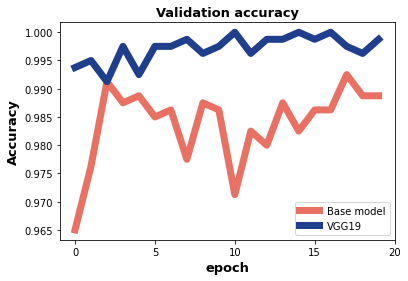

In [ ]:
plt.plot(hist.history['val_accuracy'],color='#e87164',linewidth=7)
plt.plot(history.history['val_accuracy'],color='#1f3e8c',linewidth=7)
plt.title('Validation accuracy',fontsize=13,fontweight="bold")
plt.ylabel('Accuracy',fontsize=13,fontweight="bold")
plt.xlabel('epoch',fontsize=13,fontweight="bold")
plt.xticks(range(0,21 ,5))
plt.legend(['Base model', 'VGG19'], loc='bottom right')
plt.show();

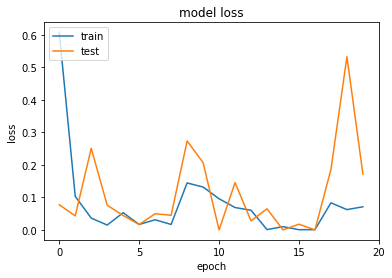

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(0,21 ,5))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Testing

In [ ]:
## loading tesing  images
x_test=[]
y_test=[]
for i in os.listdir('/content/Face Mask Dataset/Test'):
  for img in os.listdir(f'/content/Face Mask Dataset/Test/{i}'):
    img=image.load_img(f'/content/Face Mask Dataset/Test/{i}/{img}',target_size=(96, 96))
    x_test.append(img)
    y_test.append(i)

In [ ]:
for i in range(len(x_test)):
  x_test[i]= image.img_to_array(x_test[i])

x_test= np.array(x_test)
x_test= np.array(x_test)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_test)
y_label_test = encoder.transform(y_test)

In [ ]:
y_pred_test=model.predict(x_test)

In [ ]:
# accuracy_score(y_label_test,np.where(y_pred>0.5,1,0))
pd.DataFrame(data=[accuracy_score(y_label_test, np.where(y_pred_test>0.5,1,0)), recall_score(y_label_test, np.where(y_pred_test>0.5,1,0)),
                   precision_score(y_label_test, np.where(y_pred_test>0.5,1,0)), roc_auc_score(y_label_test, np.where(y_pred_test>0.5,1,0))], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.995968
recall,0.994106
precision,0.998028
roc_auc_score,0.996018


Text(33.0, 0.5, 'True')

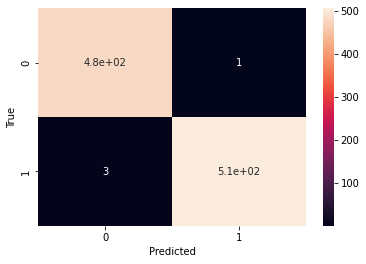

In [ ]:
sns.heatmap(confusion_matrix(y_label_test, np.where(y_pred_test>0.5,1,0)),annot=True,cmap='rocket')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
our_imgs=[]
pics=[]
for img in os.listdir('/content/drive/MyDrive/Deep/test'):
  img=image.load_img(f'/content/drive/MyDrive/Deep/test/{img}',target_size=(96, 96))
  our_imgs.append(img)
  pics.append(img)

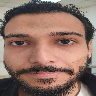

In [ ]:
pics[3]

In [ ]:
for i in range(len(our_imgs)):
  our_imgs[i]= image.img_to_array(our_imgs[i])

In [ ]:
our_imgs= np.array(our_imgs)
our_imgs_pred=model.predict(our_imgs)

In [ ]:
labels = []

for i in range(0,len(our_imgs_pred)):

  x=round(our_imgs_pred[i][0])
  z=encoder.inverse_transform([x])
  labels.append(z)

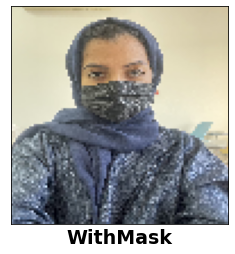

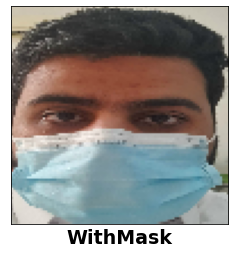

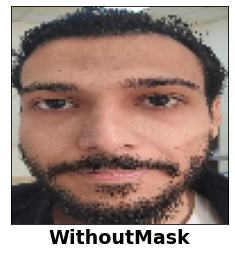

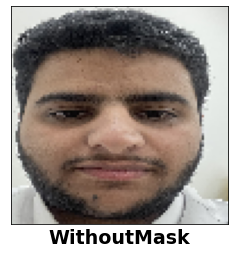

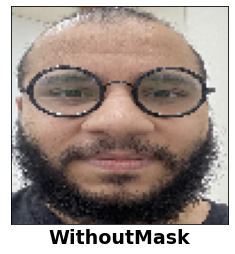

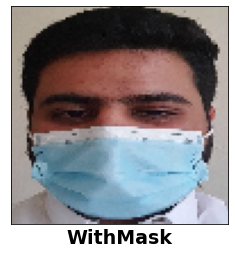

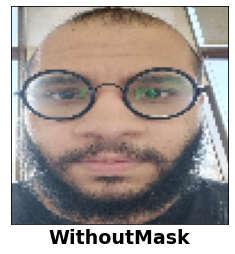

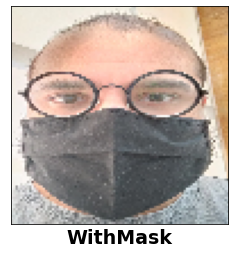

In [ ]:
for i in range(0,8):
  plt.figure()
  plt.imshow(pics[i])
  plt.xlabel(labels[i][0],fontsize=19,fontweight="bold")
  plt.xticks([])
  plt.yticks([])